In [2]:
from tqdm import tqdm
from time import sleep
import subprocess, csv, time, os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read the CSV file and calculate percentiles for the time_total column
def plot_percentiles_from_csv(filename, figname):
    data = pd.read_csv(filename)
    p90 = np.percentile(data['time_total'], 90)
    p95 = np.percentile(data['time_total'], 95)
    p99 = np.percentile(data['time_total'], 99)

    # Plotting
    plt.figure(figsize=(10, 6))
    sorted_data = np.sort(data['time_total'])
    plt.step(sorted_data, np.linspace(0, 1, len(sorted_data), endpoint=False), label='CDF', where='post')

    # Highlight p90, p95, and p99
    # plt.axvline(x=p90, color='blue', linestyle='--', label=f'p90 ({p90:.4f}s)')
    plt.axvline(x=p90, color='blue', linestyle='--', label=f'p90 line')
    plt.axvline(x=p95, color='green', linestyle='--', label=f'p95 line')
    plt.axvline(x=p99, color='red', linestyle='--', label=f'p99 line')

    plt.xlabel('Response Time (seconds)')
    plt.ylabel('CDF')
    plt.title('CDF of Response Times with p90, p95, p99 Highlighted')
    plt.legend()
    plt.grid(True)
    
    plt.savefig(figname)
    plt.close()

In [4]:
csv_file1 = 'ms_scheduling/book_info/perf_testing/data/motivation/04080138_Req100_responses.csv'
csv_file2 = 'ms_scheduling/book_info/perf_testing/data/motivation/04080147_Req500_responses.csv'
csv_file3 = 'ms_scheduling/book_info/perf_testing/data/motivation/04080228_Req1000_responses.csv'


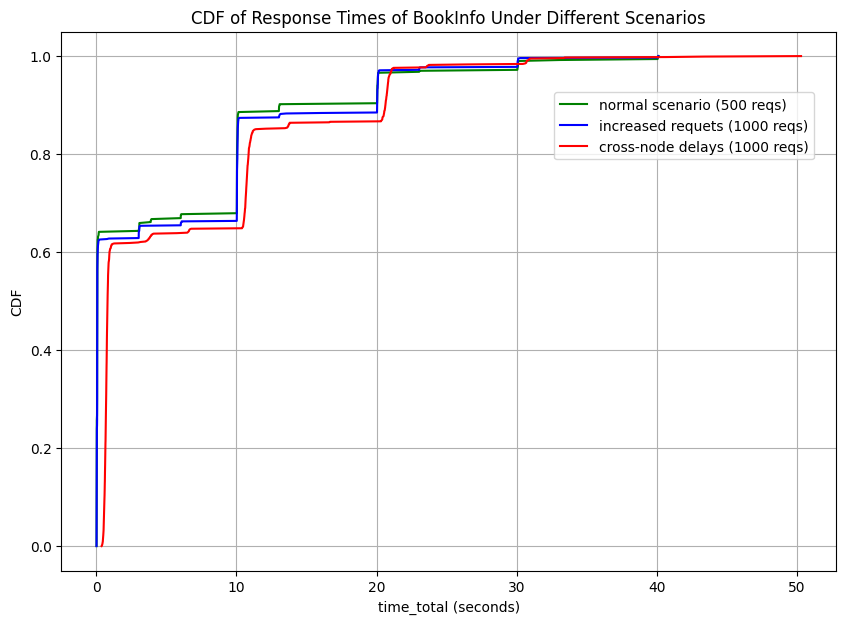

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paths to the CSV files

csv_file1 = '/home/ubuntu/ms_scheduling/book_info/perf_testing/data/motivation/04080147_Req500_responses.csv' # deafult --Green, 500reqs
csv_file2 = '/home/ubuntu/ms_scheduling/book_info/perf_testing/data/motivation/04080228_Req1000_responses.csv'# Increased --blue, 1000reqs
csv_file3 = '/home/ubuntu/ms_scheduling/book_info/perf_testing/data/motivation/04081440_Req1000_responses.csv' #cross-node delays---red, 1000reqs

# Load the datasets
df1 = pd.read_csv(csv_file1)
df2 = pd.read_csv(csv_file2)
df3 = pd.read_csv(csv_file3)



# Prepare the figure
plt.figure(figsize=(10, 7))

# Function to plot CDF
def plot_cdf(data, label, color):
    # Sort the data
    data_sorted = np.sort(data)
    # Calculate the CDF values
    yvals = np.arange(len(data_sorted)) / float(len(data_sorted) - 1)
    # Plot
    plt.plot(data_sorted, yvals, label=label, color=color)

# Specifying colors for each dataset
colors = ['green', 'blue','red']

# Plotting CDF for each dataset

#csv_file0 = '/home/ubuntu/ms_scheduling/book_info/perf_testing/data/motivation/04080138_Req100_responses.csv'
# df0 = pd.read_csv(csv_file0)
# plot_cdf(df0['time_total'], 'testing plot', color='grey')

plot_cdf(df1['time_total'], 'normal scenario (500 reqs)', colors[0])
plot_cdf(df2['time_total'], 'increased requets (1000 reqs)', colors[1])
plot_cdf(df3['time_total'], 'cross-node delays (1000 reqs)', colors[2])



# Customizing the plot
plt.xlabel('time_total (seconds)')
plt.ylabel('CDF')
plt.title('CDF of Response Times of BookInfo Under Different Scenarios')
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 0.9))

plt.grid(True)

# Show plot
plt.show()


In [6]:
# print the p90, p95 and p99
    # p90 = np.percentile(data['time_total'], 90)
p95 = np.percentile(df1['time_total'], 95)
    # p99 = np.percentile(data['time_total'], 99)

df =[df1,df2, df3]
for i in range(3):
    p90 = np.percentile(df[i]['time_total'], 90)
    p95 = np.percentile(df[i]['time_total'], 95)
    p99 = np.percentile(df[i]['time_total'], 99)

    cdf_percental = [p90, p95, p99]
    
    print(f'The data for df{i+1}: p90 = {cdf_percental[0]}, p95 = {cdf_percental[1]}, p99 = {cdf_percental[2]}')

The data for df1: p90 = 13.0728157, p95 = 20.07485375, p99 = 30.125213169999974
The data for df2: p90 = 20.037097499999998, p95 = 20.085016749999998, p99 = 30.06093349
The data for df3: p90 = 20.6235631, p95 = 20.825759599999998, p99 = 30.70280846


In [7]:
(20.04-13.07)/13.07

0.5332823259372608

In [8]:
(20.63-13.07)/13.07

0.5784238714613618

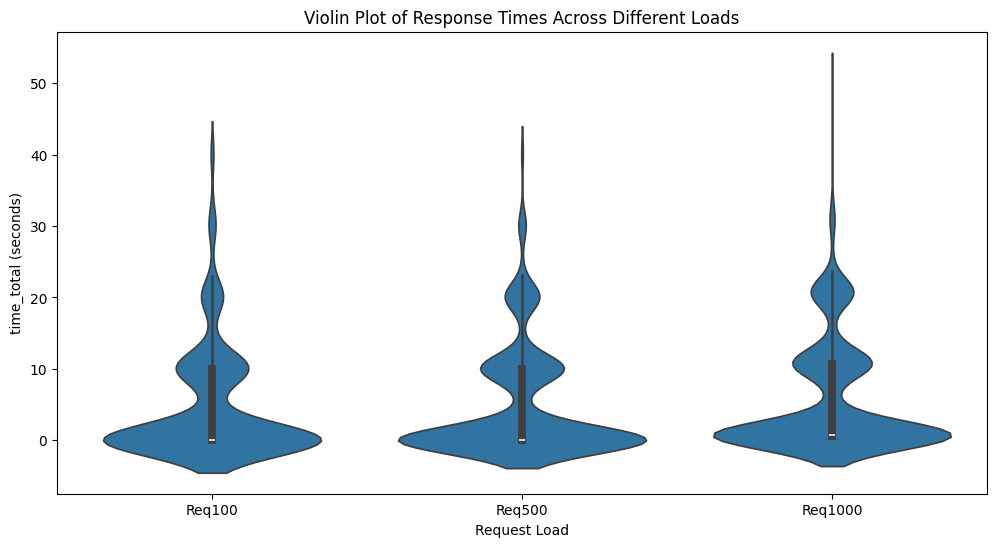

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paths to the CSV files
# csv_file1 = '/home/ubuntu/ms_scheduling/book_info/perf_testing/data/motivation/04080138_Req100_responses.csv'
# csv_file2 = '/home/ubuntu/ms_scheduling/book_info/perf_testing/data/motivation/04080147_Req500_responses.csv'
# csv_file3 = '/home/ubuntu/ms_scheduling/book_info/perf_testing/data/motivation/04080228_Req1000_responses.csv'

# Load the datasets
df1 = pd.read_csv(csv_file1)
df2 = pd.read_csv(csv_file2)
df3 = pd.read_csv(csv_file3)

# Adding a column to each DataFrame to denote the dataset
df1['Request Load'] = 'Req100'
df2['Request Load'] = 'Req500'
df3['Request Load'] = 'Req1000'

# Combining the dataframes
combined_df = pd.concat([df1, df2, df3])

# Plotting
plt.figure(figsize=(12, 6))
sns.violinplot(x='Request Load', y='time_total', data=combined_df)

plt.title('Violin Plot of Response Times Across Different Loads')
plt.xlabel('Request Load')
plt.ylabel('time_total (seconds)')

plt.show()
